In [1]:
# Import Data

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load the dataset

df = pd.read_csv('/content/marketing_data.csv')

In [3]:
# check for the Dataframe for 5 rows

df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country
0,1826,1970,Graduation,Divorced,"$84,835.00",0,0,6/16/14,0,189,...,6,1,0,0,0,0,0,1,0,SP
1,1,1961,Graduation,Single,"$57,091.00",0,0,6/15/14,0,464,...,7,5,0,0,0,0,1,1,0,CA
2,10476,1958,Graduation,Married,"$67,267.00",0,1,5/13/14,0,134,...,5,2,0,0,0,0,0,0,0,US
3,1386,1967,Graduation,Together,"$32,474.00",1,1,5/11/14,0,10,...,2,7,0,0,0,0,0,0,0,AUS
4,5371,1989,Graduation,Single,"$21,474.00",1,0,4/8/14,0,6,...,2,7,1,0,0,0,0,1,0,SP


In [4]:
# check for rows and columns

df.shape

(2240, 28)

In [5]:
# check for dtypes every columns

df.dtypes

ID                      int64
Year_Birth              int64
Education              object
Marital_Status         object
 Income                object
Kidhome                 int64
Teenhome                int64
Dt_Customer            object
Recency                 int64
MntWines                int64
MntFruits               int64
MntMeatProducts         int64
MntFishProducts         int64
MntSweetProducts        int64
MntGoldProds            int64
NumDealsPurchases       int64
NumWebPurchases         int64
NumCatalogPurchases     int64
NumStorePurchases       int64
NumWebVisitsMonth       int64
AcceptedCmp3            int64
AcceptedCmp4            int64
AcceptedCmp5            int64
AcceptedCmp1            int64
AcceptedCmp2            int64
Response                int64
Complain                int64
Country                object
dtype: object

In [6]:
# view columns set

df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', ' Income ',
       'Kidhome', 'Teenhome', 'Dt_Customer', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Response', 'Complain', 'Country'],
      dtype='object')

In [7]:
# check unbalanced data response

df['Response'].value_counts()

0    1906
1     334
Name: Response, dtype: int64

In [8]:
# manipulating for replace

df.columns = df.columns.str.replace(' ', '')
df['Income'] = df['Income'].str.replace('$', '')
df['Income'] = df['Income'].str.replace(',', '')
df['Income'] = df['Income'].astype('float')

In [9]:
# check missing values

df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Response                0
Complain                0
Country                 0
dtype: int64

In [10]:
# adding missing value

df['Income'].fillna(df['Income'].mean(), inplace=True)

In [11]:
# drop/delete ID because have all unique value

df = df.drop(columns='ID')

In [12]:
# change dtypes DT_customer from object to datetime, because it's timeseries

df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [13]:
# make new column for Costumer Age

df['Costumer_Age'] = df['Dt_Customer'].dt.year - df['Year_Birth']
df['Costumer_Age'].unique()

array([ 44,  53,  56,  47,  25,  60,  66,  34,  54,  32,  36,  55,  59,
        37,  43,  58,  39,  28,  42,  40,  23,  26,  29,  52,  45,  41,
        30,  27,  62,  50,  31,  57,  38,  51,  35,  49,  48,  65,  68,
        64,  33,  63,  22,  61,  67,  46,  24,  69,  21,  20,  70, 121,
        16,  18,  19, 114,  17,  71,  72,  73, 113])

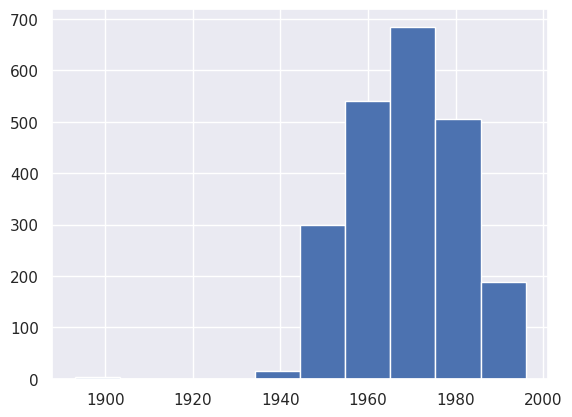

In [14]:
# Distribution Normal for Year birth

plt.hist(df['Year_Birth']);

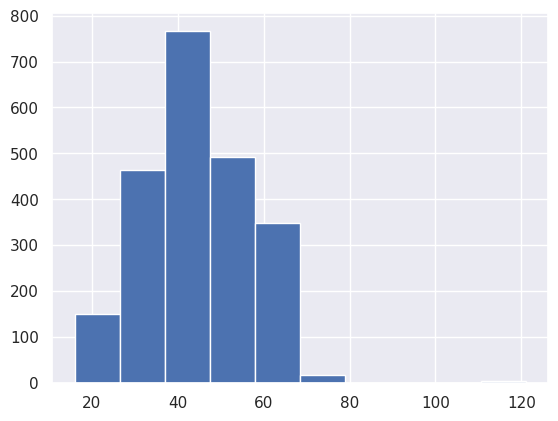

In [15]:
# Distribution Normal for Costumer Age

plt.hist(df['Costumer_Age']);

<Axes: xlabel='Costumer_Age', ylabel='Count'>

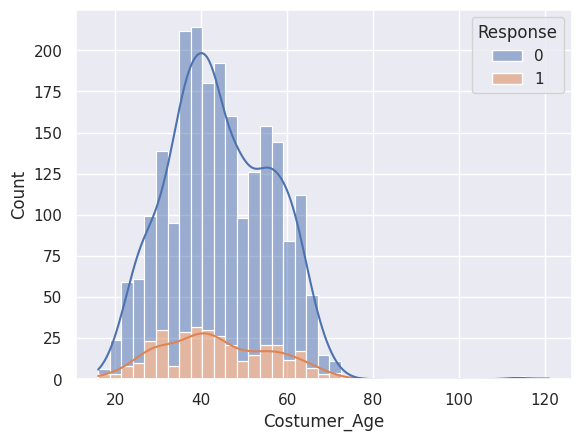

In [16]:
sns.histplot(data=df, x='Costumer_Age', hue='Response', multiple='stack', kde=True)

In [17]:
# check for duplicated rows

df.duplicated().sum()

47

<Axes: >

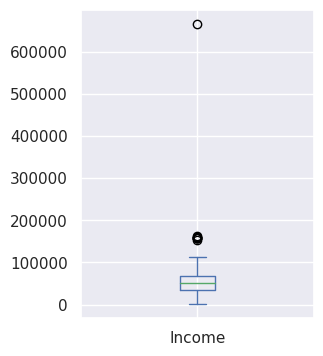

In [18]:
# Visualization boxplot to see outliers for Income

df.Income.plot(kind='box', figsize=(3,4))

In [19]:
# check the row that becomes an outliers

Q1 = df.Income.quantile(0.25)
Q3 = df.Income.quantile(0.75)
IQR = Q3 - Q1
df[df.Income > Q3+1.5*IQR]

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Costumer_Age
325,1977,Graduation,Together,157146.0,0,0,2013-04-29,13,1,0,...,1,0,0,0,0,0,0,0,SA,36
497,1982,PhD,Married,160803.0,0,0,2012-08-04,21,55,16,...,0,0,0,0,0,0,0,0,US,30
527,1977,Graduation,Together,666666.0,1,0,2013-06-02,23,9,14,...,6,0,0,0,0,0,0,0,SA,36
731,1976,PhD,Together,162397.0,1,1,2013-06-03,31,85,1,...,1,0,0,0,0,0,0,0,SP,37
853,1971,Master,Together,157733.0,1,0,2013-06-04,37,39,1,...,1,0,0,0,0,0,0,0,SP,42
1826,1975,Graduation,Divorced,153924.0,0,0,2014-02-07,81,1,1,...,0,0,0,0,0,0,0,0,SP,39
1925,1949,PhD,Married,156924.0,0,0,2013-08-29,85,2,1,...,0,0,0,0,0,0,0,0,CA,64
2204,1973,PhD,Married,157243.0,0,1,2014-03-01,98,20,2,...,0,0,0,0,0,0,0,0,IND,41


In [20]:
# drop the outliers

df = df[(df['Income'] >= Q1 - 1.5 * IQR) & (df['Income'] <= Q3 + 1.5 * IQR)]

<Axes: >

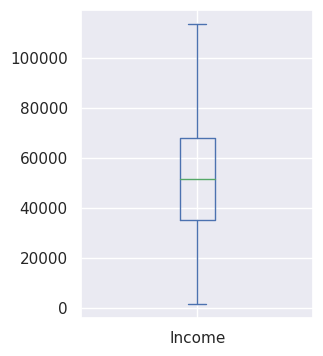

In [21]:
# visualization after drop outliers

df.Income.plot(kind='box', figsize=(3,4))

In [22]:
# check Education for distribution

df['Education'].value_counts()

Graduation    1124
PhD            482
Master         369
2n Cycle       203
Basic           54
Name: Education, dtype: int64

<Axes: xlabel='Education', ylabel='Count'>

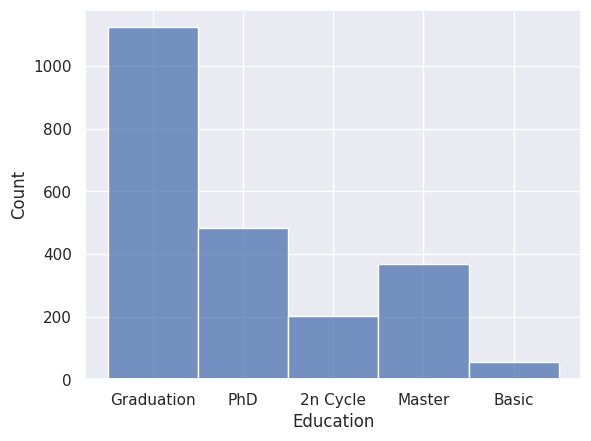

In [23]:
# visualization for Education distribution

sns.histplot(data=df, x='Education')

In [24]:
df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Costumer_Age
0,1970,Graduation,Divorced,84835.0,0,0,2014-06-16,0,189,104,...,1,0,0,0,0,0,1,0,SP,44
1,1961,Graduation,Single,57091.0,0,0,2014-06-15,0,464,5,...,5,0,0,0,0,1,1,0,CA,53
2,1958,Graduation,Married,67267.0,0,1,2014-05-13,0,134,11,...,2,0,0,0,0,0,0,0,US,56
3,1967,Graduation,Together,32474.0,1,1,2014-05-11,0,10,0,...,7,0,0,0,0,0,0,0,AUS,47
4,1989,Graduation,Single,21474.0,1,0,2014-04-08,0,6,16,...,7,1,0,0,0,0,1,0,SP,25


In [26]:
df['Marital_Status'].unique()

array(['Divorced', 'Single', 'Married', 'Together', 'Widow', 'YOLO',
       'Alone', 'Absurd'], dtype=object)

In [27]:
df['Marital_Status'].value_counts()

Married     861
Together    576
Single      480
Divorced    231
Widow        77
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [29]:
df['Marital_Status'] = df['Marital_Status'].str.replace('Alone', 'Other')
df['Marital_Status'] = df['Marital_Status'].str.replace('YOLO', 'Other')
df['Marital_Status'] = df['Marital_Status'].str.replace('Absurd', 'Other')

<Axes: xlabel='Marital_Status', ylabel='count'>

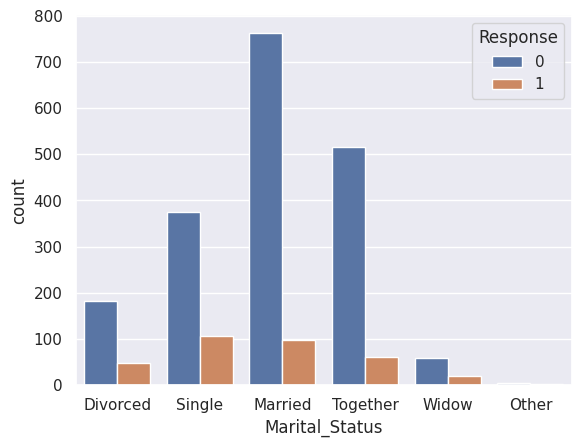

In [30]:
sns.countplot(x='Marital_Status', hue='Response', data=df)

In [32]:
df['Num_Dependants'] = df['Kidhome'] + df['Teenhome']
df.drop(columns=(['Kidhome', 'Teenhome']))

,Year_Birth,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Response,Complain,Country,Costumer_Age,Num_Dependants
0,1970,Graduation,Divorced,84835.0,2014-06-16,0,189,104,379,111,...,0,0,0,0,0,1,0,SP,44,0
1,1961,Graduation,Single,57091.0,2014-06-15,0,464,5,64,7,...,0,0,0,0,1,1,0,CA,53,0
2,1958,Graduation,Married,67267.0,2014-05-13,0,134,11,59,15,...,0,0,0,0,0,0,0,US,56,1
3,1967,Graduation,Together,32474.0,2014-05-11,0,10,0,1,0,...,0,0,0,0,0,0,0,AUS,47,2
4,1989,Graduation,Single,21474.0,2014-04-08,0,6,16,24,11,...,1,0,0,0,0,1,0,SP,25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,1976,PhD,Divorced,66476.0,2013-03-07,99,372,18,126,47,...,0,0,0,0,0,0,0,US,37,1
2236,1977,2n Cycle,Married,31056.0,2013-01-22,99,5,10,13,3,...,0,0,0,0,0,0,0,SP,36,1
2237,1976,Graduation,Divorced,46310.0,2012-12-03,99,185,2,88,15,...,0,0,0,0,0,0,0,SP,36,1
2238,1978,Graduation,Married,65819.0,2012-11-29,99,267,38,701,149,...,0,0,0,0,0,0,0,IND,34,0


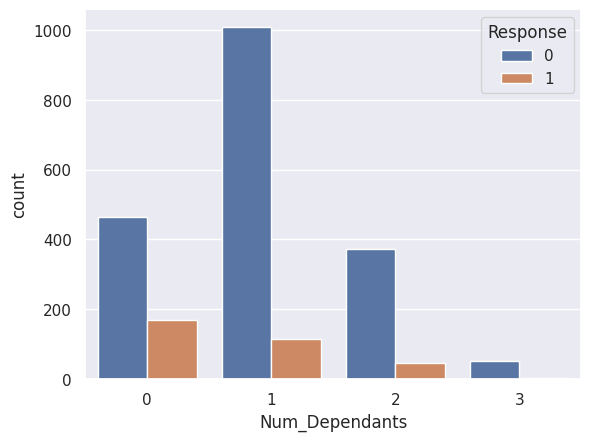

In [34]:
sns.countplot(x='Num_Dependants', hue='Response', data=df);

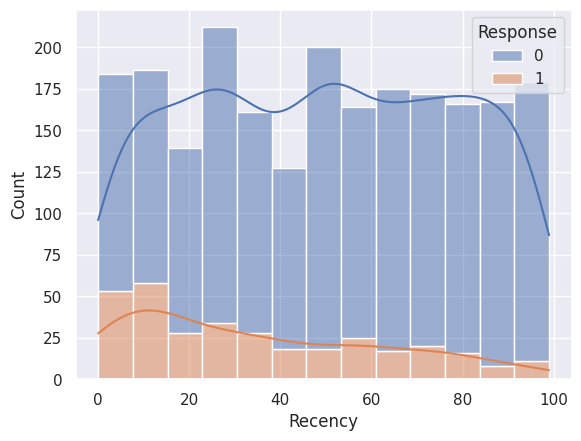

In [36]:
# Recency

sns.histplot(data=df, x='Recency', hue='Response', multiple='stack', kde=True);

In [48]:
# complain

df[['Complain', 'Response']].corr()[['Response']]

# doesn't have correlation

,Response
Complain,-0.001854
Response,1.000000


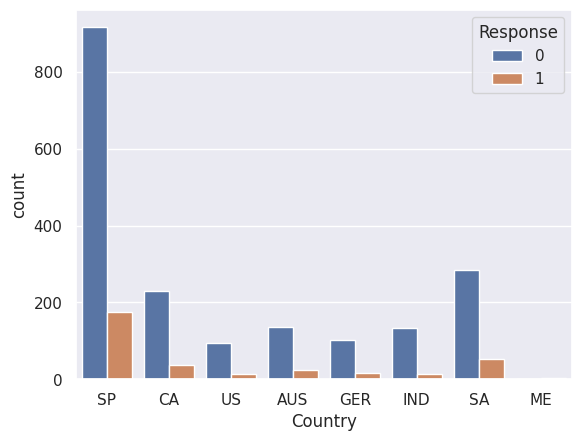

In [51]:
# Country

sns.countplot(x='Country', hue='Response', data=df);